#Assignment: Exploratory Data Analysis with the Titanic Dataset


Finish the following tasks in the class using the dataset:
`https://raw.githubusercontent.com/sumonacalpoly/Datasets/main/Titanic_train.csv`

The dataset contains information about 2206 passengers and crew members aboard the RMS Titanic when it sank on April 15, 1912. The Titanic dataset is typically used as a classification dataset. The key target variable is usually "survived," which is a binary outcome indicating whether a passenger survived (1) or did not survive (0) the disaster. Consequently, many analyses and predictive models built on this dataset focus on classifying passengers into these two groups based on various features like age, gender, ticket class, and more.

In this assignment, you will explore the distributions of key variables, compute medians, and create visualizations to better understand the data.

**Learning Outcomes & Objectives:**

- **Outcomes:**  
  - Gain proficiency in exploratory data analysis (EDA) techniques using Python.
  - Learn how to compute and interpret descriptive statistics (e.g., median) and visualize data distributions (histograms, KDE, box plots).
  - Understand how to analyze relationships between variables—especially using appropriate correlation measures for classification (like point biserial correlation). Kindly read material on correlation and its different types based on the type of variable.
  - Develop insights into socio-economic differences and survival patterns within the Titanic dataset.

- **Objectives:**  
  - Explore the Titanic dataset to uncover meaningful patterns in survival outcomes.
  - Apply visualization techniques to compare distributions (e.g., fare differences across classes) and analyze categorical vs. continuous relationships.
  - Use EDA as a foundation to inform feature engineering and subsequent predictive modeling.

This assignment will provide a clear roadmap for understanding the data and the analytical techniques essential for effective EDA.

**Answer the questions that follow and completet the code**

**1 Read in the Titanic data set**

In [2]:
#read in the titanic dataset`

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Titanic dataset
titanic_df = pd.read_csv('https://raw.githubusercontent.com/sumonacalpoly/Datasets/main/Titanic_train.csv')

# Display the first few rows of the dataset
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


**2 What is the observational unit?**


In [ ]:
#what is the observational unit
# The observational unit is each passenger on the Titanic. Each row in the dataset represents a single passenger, 
# and the columns contain various attributes related to that passenger, such as their name, age,

**3. What column seems to be an appropriate index for this data set? Do you see any problems with using this column as the index?**




In [3]:
# [ ] # YOUR CODE HERE (if you want to further investigate the uniqueness of the 'name' column)
# For instance, you might try:
#what column seems to be an appropriate index for this data set? do you see any problems with using this column as the index?

titanic_df['Name'].is_unique # check if the Name column is unique
#turns true
#the name column is unique which is good for an index because it means that each row
#is unique and can be identified by the name of the passenger.
## However, using the name as an index may not be ideal for several reasons:
#1. Names can be long and complex, making them less efficient for indexing.
#2. there can be duplicate names in the dataset, especially if there are multiple passengers with the same name.


True

let’s set "Name" as the index and then extract a DataFrame with information about the members of the Widener family. The dataset has one of the Widener family: Only one person named

"Widener, Mr. Harry Elkins"
Use the following code to Set 'Name' as the index of the DataFrame
`titanic_df.set_index("Name", inplace=True)`

**4. Extract rows corresponding to the Widener family**

In [4]:
#extracting rows corresponding to the Widener Family
titanic_df.set_index("Name", inplace=True)
widener_df = titanic_df[titanic_df.index.str.contains("Widener")]
print(widener_df)
print(widener_df.shape[0])  # Should print 1
#this should print 1 because there is only one row in the dataset that corresponds to the Widener family.


                           PassengerId  Survived  Pclass   Sex   Age  SibSp  \
Name                                                                          
Widener, Mr. Harry Elkins          378         0       1  male  27.0      0   

                           Parch  Ticket   Fare Cabin Embarked  
Name                                                            
Widener, Mr. Harry Elkins      2  113503  211.5   C82        C  
1


**5. Compute the Median Age of passengers.**

Hint: Use the .median() method in pandas.

In [6]:
# Ensure that the cell defining `titanic_df` is executed before running this cell.

# Compute the median age of the passengers in the dataset
median_age = titanic_df['Age'].median()
print(f"The median age of passengers is {median_age:.1f} years.")


The median age of passengers is 28.0 years.


**6. Visualize the Age Distribution**:
Create a histogram of the age variable to visualize its distribution.

Text(0.5, 1.0, 'Age Distribution of Titanic Passengers')

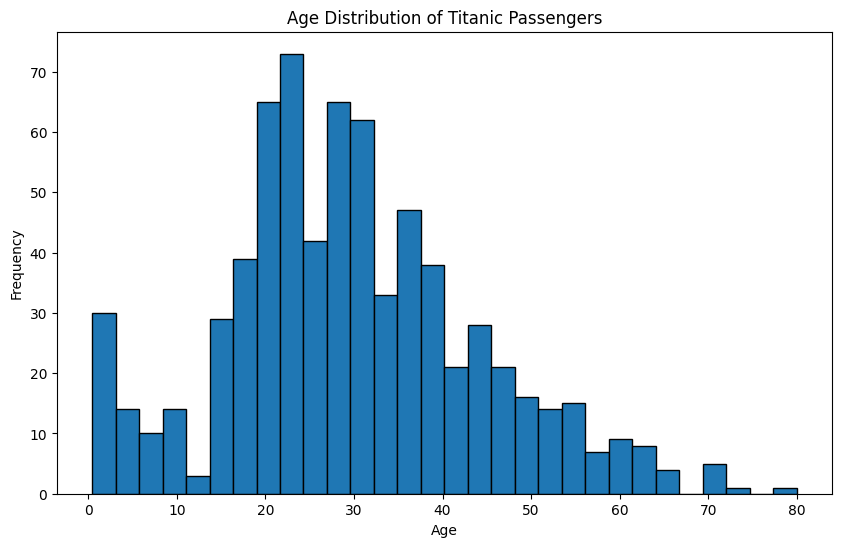

In [7]:
#visualize the distribution of ages in the dataset, create a histogram of the age variable to visualize its distribution
plt.figure(figsize=(10, 6))
plt.hist(titanic_df['Age'].dropna(), bins=30, edgecolor='black')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution of Titanic Passengers')

#the histogram shows that most passengers are between 20 and 30
#it also hows that there are very few older passengers


**7. Calculate both the mean and the median of the fare column.**



In [8]:
# YOUR CODE HERE: Calculate and print mean and median fare
mean_fare = titanic_df['Fare'].mean()
median_fare = titanic_df['Fare'].median()

print(f"Mean Fare: {mean_fare:.2f}")
print(f"Median Fare: {median_fare:.2f}")




Mean Fare: 32.20
Median Fare: 14.45


**8. What does the difference between the mean and the median suggest about the fare distribution?**

In [ ]:
#the difference between the mean and median fare is that the mean fare is higher than the median fare
#this is because the mean is affected by outliers, while the median is not
#the mean fare is higher than the median fare because there are a few passengers who paid very high fares,
#which skews the mean up

**9. Create a box plot to visualize the distribution of fares across different passenger classes (Pclass).**

**10. What differences do you notice in the fare distributions among the classes?**

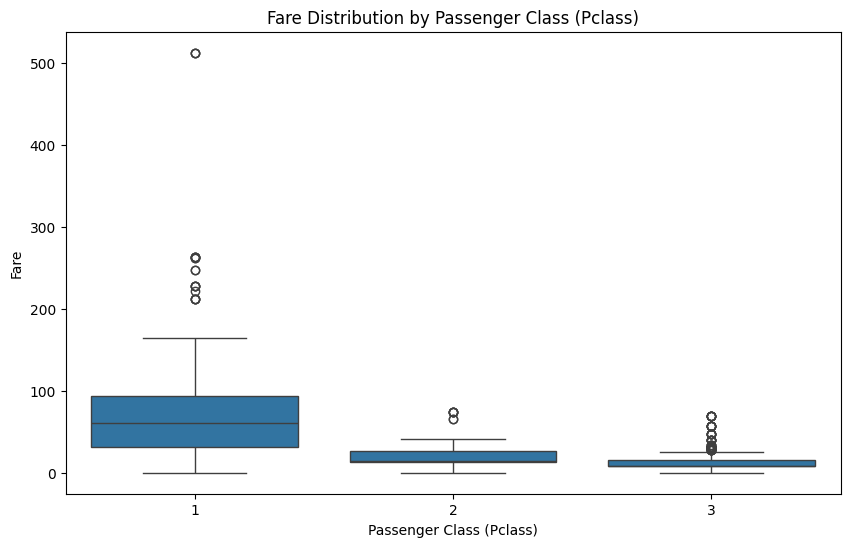

In [ ]:
#9. create a boxplot to visualize the fare distribution across different passenger classes (Pclass)
plt.figure(figsize=(10, 6))
sns.boxplot(x='Pclass', y='Fare', data=titanic_df)
plt.xlabel('Passenger Class (Pclass)')
plt.ylabel('Fare')
plt.title('Fare Distribution by Passenger Class (Pclass)')
plt.show()

#10. what diff do you notice in the fare distribution among the classes?
# first class passangers paid the highest fares, while third class passengers paid the lowest fares.
#this is expected because first class passengers are usually wealthier and can afford to pay more
# for their tickets.
# 2nd class fares were lower than 1st class fares but still had some variation with fewer 
# extreme outliers.

**11. Consider how the median fare and the spread of fares differ between classes. What might this indicate about the socio-economic differences among passengers?**



In [ ]:
#The differences in median fare and spread show clear socio-economic gaps.
# 1st Class passengers paid much more, showing they were wealthier,
# while 2nd and 3rd Class passengers had lower fares which would reflect limited means.



**12. Survival Rate Analysis by Passenger Class:**
Create a bar plot that shows the survival rate (i.e., proportion of survivors) for each passenger class. Use the `Pclass` and `Survived` columns to calculate the survival rate.

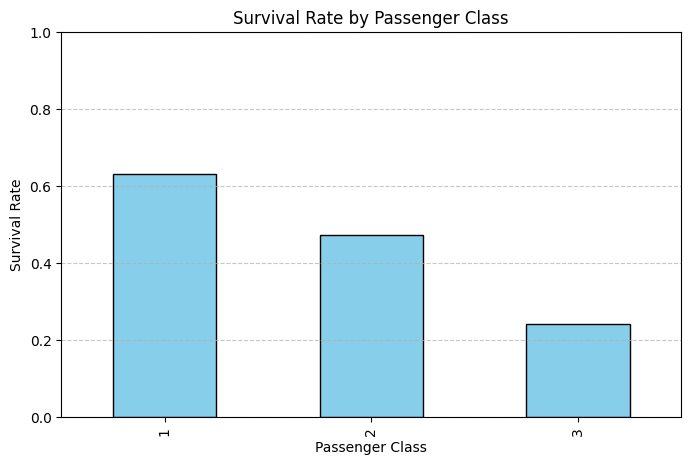

In [11]:
# YOUR CODE HERE: Calculate survival rate per class and create a bar plot
# Calculate survival rate per class
survival_rate = titanic_df.groupby('Pclass')['Survived'].mean()

# Plot the survival rates
survival_rate.plot(kind='bar', figsize=(8, 5), color='skyblue', edgecolor='black')

plt.title('Survival Rate by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Survival Rate')
plt.ylim(0, 1)  # since it's a proportion between 0 and 1
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()



**13. What insights can you derive regarding the relationship between passenger class and survival rate?**



Survival rate was highest in 1st class and lowest in 3rd class.  
This suggests that passenger class had a strong influence on survival, likely due to better access to lifeboats or safety resources for higher classes.


**14. Correlation Analysis Using Point Biserial Correlation**:
For a continuous variable like fare or age and the binary target survived, compute the point biserial correlation. Use `scipy.stats.pointbiserialr` for this task.

In [15]:
from scipy.stats import pointbiserialr

# Drop rows where Age or Survived is missing
age_data = titanic_df[['Survived', 'Age']].dropna()
corr_age, _ = pointbiserialr(age_data['Survived'], age_data['Age'])
print("Correlation between Age and Survival:", round(corr_age, 4))

# Drop rows where Fare or Survived is missing
fare_data = titanic_df[['Survived', 'Fare']].dropna()
corr_fare, _ = pointbiserialr(fare_data['Survived'], fare_data['Fare'])
print("Correlation between Fare and Survival:", round(corr_fare, 4))


Correlation between Age and Survival: -0.0772
Correlation between Fare and Survival: 0.2573


**15. How strong are the associations between age/fare and survival? What might these correlations indicate about survival likelihood?**

In [ ]:
# The association between age and survival is very weak (correlation = -0.0772), 
# suggesting that age had little influence on survival likelihood.

# The association between fare and survival is moderate (correlation = 0.2573), 
# meaning passengers who paid higher fares were more likely to survive —
# likely because they were in higher classes with better access to lifeboats.

